In [20]:
import mglearn
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
import numpy as np
from sklearn.model_selection import train_test_split

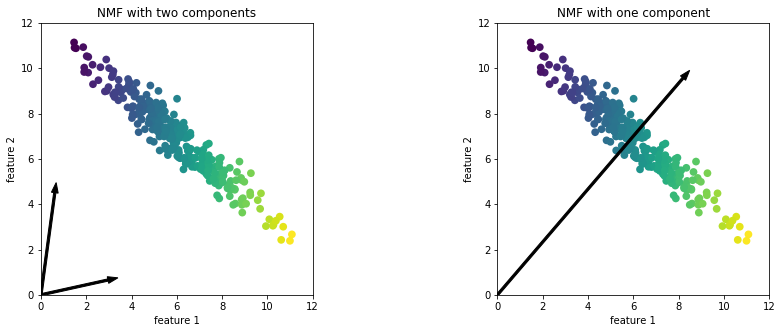

In [6]:
mglearn.plots.plot_nmf_illustration()

<class 'numpy.ndarray'>
(3023, 87, 65)


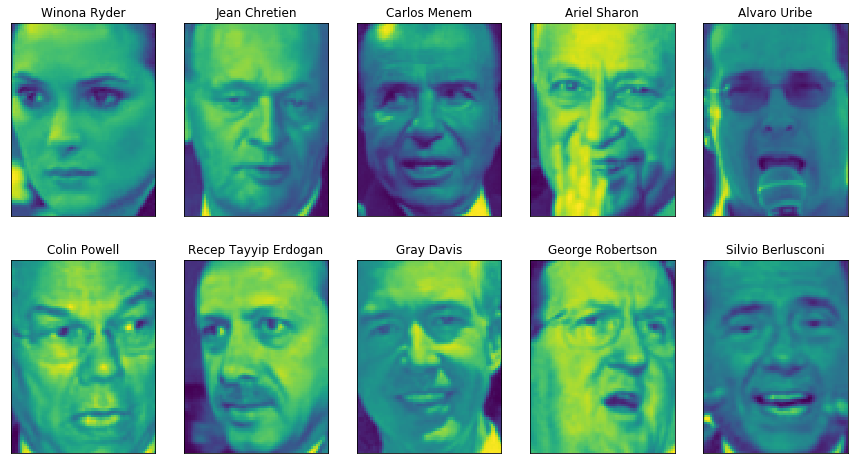

In [13]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
# 일상 속에서 찍힌 라벨링 된 얼굴 사진 데이터셋. 한 사람에 대하여 20장의 다른 사진들이 들어가고, 원본 크기의 70%
print(type(people.images))
print(people.images.shape)
image_shape = people.images[0].shape
# (87, 65) 크기의 사진 한 장이 image_shape에 들어간다.
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [16]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

In [17]:
X_people = people.data[mask]
y_people = people.target[mask]

In [18]:
X_people = X_people / 255.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
_____________________________________________________nmf_faces - 683.2s, 11.4min


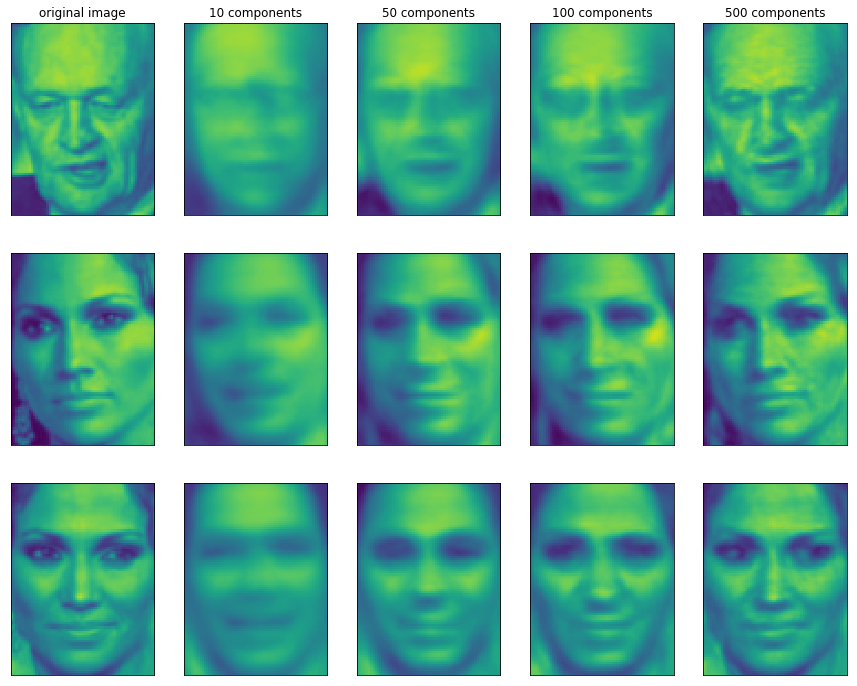

In [22]:
# !!! time consumed
mglearn.plots.plot_nmf_faces(X_train,X_test,image_shape)

In [1]:
%matplotlib inline
#from preamble import *
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = "gray"
import mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=0.1)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaler = StandardScaler()
X_scaled = scaler.fit(X_train).transform(X_train)
X_scaled_d = scaler.fit_transform(X_train)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm = SVC(C=100)
svm.fit(X_train_scaled, y_train)

from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

/Users/dohk/anaconda3/lib/python3.6/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/Users/dohk/anaconda3/lib/python3.6/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


#### 3.4.2 Non-Negative Matrix Factorization (NMF)
![Alt text](../image/abcd.png)
- NMF
  - 여러 알고리즘을 모아 놓은 것. NMF 계열의 알고리즘들이 있다.
  - 0 또는 양수의 주성분과 계수값만을 생성(non-negative); result matrix가 조사하기 편해진다.
  - W와 H의 각 원소가 (주성분과 계수의 가중치 합은) 음수가 아니므로 원 데이터의 특성에 음수가 없어야 함.
- NMF 활용 데이터
  - 음성/악기 오디오 데이터 (잡음 제거 효과)
  - 여러 악기 또는 음성이 섞여 있는 데이터에서 각 원본 성분들을 구분할 수 있음
- PCA vs. NMF
  - PCA
    - 음수 성분이나 계수가 만드는 효과의 이해가 어려움. 
    - 실제로 부호에는 아무런 규칙이 없음
  - NMF
    - 상대적으로 PCA보다 해석하기 쉬움.
    - PCA의 결과는 순서가 중요한 반면 NMF는 순서가 중요하지 않음
    - 모든 주성분 사이에 원본 데이터의 특질을 더 많이 포함하는 중요도 차이가 없음 --> 즉 모든 주성분은 동등하게 중요
    - 무작위 초기화 --> 난수 생성 초기값에 따라 결과가 달라짐
    
- W는 차원을 축소하고자 하는 데이터. feature의 개수가 줄어들게 되므로, 예를 들어 20000*500 -> 20000*10 으로 줄어든다.
- H는 자연스럽게 그 shape이 결정된다; 10*500

##### Applying NMF to synthetic data
- 원본 데이터 확인
  - 원본 데이터의 각 성분이 양수인지 확인하는 작업 필요
  - 각 데이터가 원점 (0,0)에서 상대적으로 어디에 놓여 있는가가 중요.
  - 즉, 원점 (0,0)에서 데이터가 가는 방향을 추출한 것으로 음수미포함 성분을 이해 가능<br/><br/>  

- NMF 알고리즘
  - $X$: 원본 입력 데이터
  - $W$: 변환 행렬
  - $H$: 주성분
  - the approximation of $X$ by $X \simeq WH$ is achieved by minimizing the error function $$\min_{W,H}|| X-WH ||_{F},~subject~to~W\geq 0, H\geq 0$$.
  - 다음과 같은 L2 노름, Frobenius Norm의 제곱인 $$\frac{1}{2} \sum_{i,j}(X_{ij}-WH_{ij})^2$$을 목적함수로 하여 '좌표 하강법'으로 최소화함
    - 위의 수식에서 V-WH를 최소화하는 W와 H를 구하는 것이 목적이 된다. interation.
  - 아래 논문을 활용하여 interation할 때마다 아래의 논문에 나오는 수식과 같은 최적화 방식을 사용
    - Daniel D. Lee & H. sebastian Seung (2001). Algorithms for Non-negative Matrix Factorization (PDF). Advances in Neural information Precessing Systems 13:  Preceedings of the 2000 Conference. MIT Press. pp. 556-562.
  

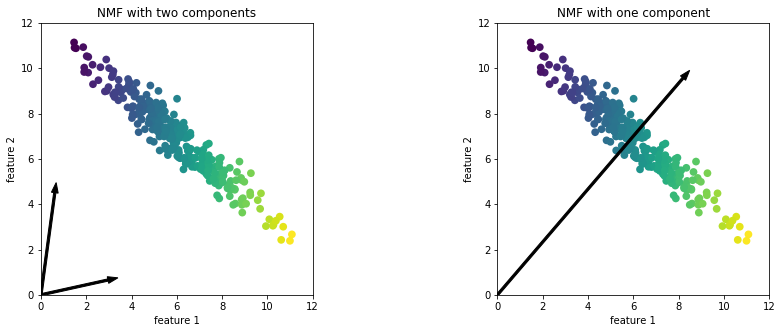

In [2]:
mglearn.plots.plot_nmf_illustration()

##### Applying NMF to face images

In [ ]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

- min(V-WH)에 의해 나온 W와 H를 이용하여 그린 결과물이 두번째 이미지부터 나오고 있다.

- 10개의 components일 경우,
  - V: 1486*5655
  - W: 1486*10
  - H: 10*5655
  
- 훈련데이터: 1482, 테스트데이터: 494

- transform연산을 가하면, W가 나온다.
- 비지도학습에 대한 훈련 데이터와 테스트 데이터를 구분하여 작업하는 아래와 같은 코딩 작업은 무의미함
  - 그리고, fit함수는 아무런 역할이 없음

In [8]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
'''
n_components : 축소하고자하는 차원의 개수
'''
nmf.fit(X_train) # min(V-WH) , X_train: V. (1486,5655)
X_train_nmf = nmf.transform(X_train) # W.
X_test_nmf = nmf.transform(X_test) # 

print(X_train_nmf.shape)
print(X_test_nmf.shape)

# fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
# for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
#     ax.imshow(component.reshape(image_shape))
#     ax.set_title("{}. component".format(i))

(426, 15)
(143, 15)


In [10]:
compn = 3 # 위의 세 번째 그림
# sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1] # 역순
'''
X_train_nmf: W
1486개의 이미지 중 네 번째에 해당하는 component를 갖고온다.
갖고온 것을 argsort 즉 오름차순으로 정렬된 인덱스를 갖고온다. -1로 역순이므로, 가장 큰 component들을 갖고온다
'''
# fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
# fig.suptitle("Large component 3")
# for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
#     ax.imshow(X_train[ind].reshape(image_shape)) # X_train에 추출한 인덱스를 넣어서 이미지 자체를 꺼냄. 해당 component가 보유한 그림들을 출력.

'\nX_train_nmf: W\n1486개의 이미지 중 네 번째에 해당하는 component를 갖고온다.\n갖고온 것을 argsort 즉 오름차순으로 정렬된 인덱스를 갖고온다. -1로 역순이므로, 가장 큰 component들을 갖고온다\n'

In [ ]:
compn = 7
# sort by 7th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig.suptitle("Large component 7")
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

In [ ]:
S = mglearn.datasets.make_signals()
print(S.shape)
print(S[0][0])
print(S[0][1])
print(S[0][2],end="\n\n")
'''
signal data
세 개의 소리가 섞인걸로 이해
'''
print("Shape of S: {}".format(S.shape))
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [ ]:
# Mix data into a 100 dimensional state
A = np.random.RandomState(0).uniform(size=(100, 3)) # 0과 1사이의 값들로 구성
X = np.dot(S, A.T) # 2000 time, 100 signal (X를 수집된 데이터로 가정)
print("Shape of measurements: {}".format(X.shape))
plt.figure(figsize=(6, 3))
plt.plot(X, '-')
plt.xlabel("Time")
plt.ylabel("Measurements")

In [ ]:
nmf = NMF(n_components=3, random_state=42) # component를 세 개로 주겠다; 2000*100 -> 2000*3
S_ = nmf.fit_transform(X) # W = S_
print("NMF - Recovered signal shape: {}".format(S_.shape))

In [ ]:
pca = PCA(n_components=3) # NMF와 비교하려는 의도.
H = pca.fit_transform(X)
print("PCA - Recovered signal shape: {}".format(H.shape))

In [ ]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
         'True sources',
         'NMF recovered signals',
         'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

- 잡음 100개 중 세 개 출력
- 정답
- S_
- H
- NMF의 성능이 잡음에서 원본을 뽑아내는 데에 PCA보다 더 좋다.

#### 3.4.3 Manifold Learning with t-SNE
- "도너츠 컵 위상적 동형"
- Manifold (다양체)
  - In mathematics, a manifold is a topological space that locally resembles Euclidean space near each point.
  - 국소적으로 유클리드 공간과 닮은 위상 공간<br/><br/>
  
- Manifold Learning $\sim$ Nonlinear dimensionality reduction
  - 시각화가 주 목적
  - 주성분으로 2개 (또는 3개)만 주로 산출
    - 기존 원본 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 것
  - 대표적인 알고리즘: t-SNE (Stochastic Neighbor Embedding)
    - 1) 각 원본 데이터를 2차원 공간에 무작위로 표현
    - 2) 원본 특성 공간에서 가까운 포인트는 보다 가깝게, 멀리 떨어진 포인트는 보다 멀어지게 만듦
    - 3) 멀리 떨어진 포인트들간의 거리를 보존하는 것보다 가까이 있는 포인트에 더 많은 비중을 둠.
    - https://ratsgo.github.io/machine%20learning/2017/04/28/tSNE/
  - 탐색적 데이터 분석에 활용

- scikit-learn의 손글씨 데이터셋
  - 1797개의 8x8 흑백 숫자 이미지

In [ ]:
from sklearn.datasets import load_digits # MNIST와는 다르다
digits = load_digits()
print("digits.data.shape: {0}".format(digits.data.shape))

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [ ]:
# build a PCA model
pca = PCA(n_components=2) # 64 -> 2
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max()) # 첫번째 특성
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max()) # 두번째 특성
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    ''' 
        특정 위치에 글씨를 쓰려면 plt.text
    '''
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

- 차원을 축소시킨 결과, 숫자들끼리 구분이 잘 안됨

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42) # fitting과 transform 동시에 해줌
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)

In [ ]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")

In [ ]:
cancer = load_breast_cancer()

cancer_tsne = TSNE(random_state=42)
cancer_data_tsne = tsne.fit_trainsform(cancer.data)